In [197]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Problem 1

The solve_ivp solver requires a callable function representing the right hand side of the IVP. Define the function predator_prey() that accepts the current r(t) and w(t) values as a 1d array y, and the current time t, and returns the right hand side of the predator-prey model as a tuple. Use $\alpha$ = 1.0, $\beta$ = 0.5, $\delta$ = 0.75, and $\gamma$ = 0.25 as your growth parameters.

In [198]:
def predator_prey(t, y):
    """Compute right hand side of Predator-Prey model based on rabbit and
    wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Predator-
            Prey model.
    """
    # Initialize
    alpha = 1.0
    beta = 0.5
    delta = 0.75
    gamma = 0.25
    r = y[0]
    w = y[1]
    return np.array([r*(alpha - beta*w), w*(-1*delta + gamma*r)])

# Problem 2

Use solve_ivp to solve the predator-prey model ODE with initial conditions (r0 , w0 ) = (5, 3) and time ranging from 0 to 20 years. Display the resulting rabbit and wolf populations over time (stored as columns in the output of solve_ivp) on the same plot.

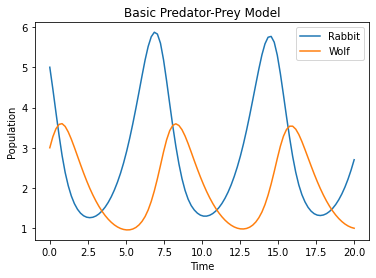

In [199]:
# Define the t parameters
t = np.linspace(0,20,100)

# Define the initial conditions
y0 = np.array([5,3])

# Solve the system
sol = solve_ivp(predator_prey, (0,20), y0, t_eval=t)

# Plot the rabbit and wolf populations over time
plt.plot(t, sol.y[0], label='Rabbit')
plt.plot(t, sol.y[1], label='Wolf')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Basic Predator-Prey Model')
plt.show()

# Problem 3

Similar to problem 1, define the function Lotka_Volterra() that takes in the current preditor and prey populations as a 1d array y and the current time as a float t and returns the right hand side of the Lotka-Volterra predator-prey model with $\eta$ = 1/3.

Using solve_ivp, solve the IVP with three different initial conditions $y_0 = (1/2, 1/3)$, $y_0 = (1/2, 3/4)$, and $y_0 = (1/16, 3/4)$ and time domain $t = [0, 13]$. Plot these three solutions on the same graph as the phase portrait and the equilibria (0, 0) and (1, 1).

Since your solutions are being plotted with the phase portrait, plot the two populations against eachother (instead of both individually against time).

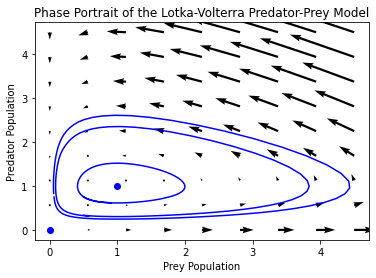

In [200]:
def Lotka_Volterra(t,y):
    """Compute right hand side of Lotka Volterra Predator-Prey model based 
    on rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Lotka 
            Volterra Predator-Prey model.
    """
    # Initialize
    nu = 1/3
    U = y[0]
    V = y[1]
    return np.array([U*(1-V), nu*V*(U-1)])
    
# Provided code for plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0,4.5,25), np.linspace(0,4.5,25))
dU, dV = Lotka_Volterra(0,(Y1, Y2))
Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

# Define the t parameters
t = np.linspace(0,13,100)

# Define the initial conditions
first_y0 = np.array([1/2,1/3])
second_y0 = np.array([1/2,3/4])
third_y0 = np.array([1/16,3/4])

# Solve the system
sol1 = solve_ivp(Lotka_Volterra, (0,13), first_y0, t_eval=t)
sol2 = solve_ivp(Lotka_Volterra, (0,13), second_y0, t_eval=t)
sol3 = solve_ivp(Lotka_Volterra, (0,13), third_y0, t_eval=t)

# Plot
plt.plot(sol1.y[0], sol1.y[1], color='blue')
plt.plot(sol2.y[0], sol2.y[1], color='blue')
plt.plot(sol3.y[0], sol3.y[1], color='blue')
plt.plot(0,0, marker='o', color='blue')
plt.plot(1,1, marker='o', color='blue')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.title('Phase Portrait of the Lotka-Volterra Predator-Prey Model')
plt.show()

# Problem 4

Define a new function Logistic_Model() that takes in the current preditor and prey populations y and the current time t and returns the right hand side of the logistic predator-prey model as a tuple.

Use solve_ivp to compute solutions (U, V) of (1.3) for initial conditions (1/3, 1/3) and (1/2, 1/5). Do this for parameter values $\eta$, $\rho$ = 1, 0.3 and also for values $\eta$, $\rho$ = 1, 1.1.

Create a phase portrait for the logistic equations using both sets of parameter values. Plot the direction field, all equilibrium points, and both solution orbits on the same plot for each set of parameter values.

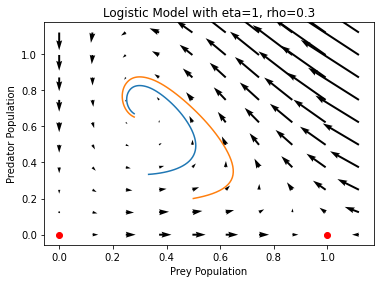

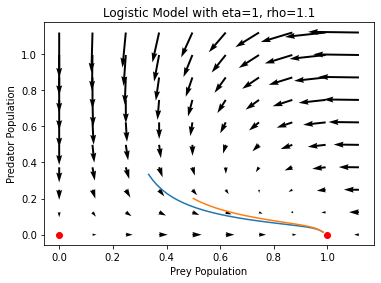

In [201]:
def Logistic_Model(t, y):
    """Compute right hand side of Logistic Predator-Prey model based on
    rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Logistic 
            Predator-Prey model.
    """
    # Initialize
    U = y[0]
    V = y[1]
    return np.array([U*(1-U-V), eta*V*(U-rho)])

eta_rhos = [[1,0.3], [1,1.1]] # Parameter pairs to use in Logistic_Model

for eta_rho in eta_rhos:
    
    # Initialize
    eta, rho = eta_rho
    fig = plt.figure(figsize=(13,9))
    ax = fig.add_subplot(221)
    
    # Provided code for plotting phase portrait.
    Y1, Y2 = np.meshgrid(np.linspace(0,1.2,30), np.linspace(0,1.2,30))
    dU, dV = Logistic_Model(0,(Y1, Y2))
    Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])

    # Define the t parameters
    t = np.linspace(0,13,100)

    # Define the initial conditions
    first_y0 = np.array([1/3,1/3])
    second_y0 = np.array([1/2,1/5])

    # Solve the system
    sol1 = solve_ivp(Logistic_Model, (0,13), first_y0, t_eval=t)
    sol2 = solve_ivp(Logistic_Model, (0,13), second_y0, t_eval=t)

    # Plot each solution for different parameter values
    plt.plot(sol1.y[0], sol1.y[1])
    plt.plot(sol2.y[0], sol2.y[1])
    plt.plot(0,0, marker='o', color='red')
    plt.plot(1,0, marker='o', color='red')    
    #plt.plot(rho, 1-rho, marker='o', color='red')
    plt.xlabel('Prey Population')
    plt.ylabel('Predator Population')
    plt.title('Logistic Model with eta=' + str(eta) + ', rho=' + str(rho))
   
plt.show()

# Problem 5

Write the functions forbes() which takes as input F(t) and returns Forbe’s equation. Also write the function energy_balance() which takes as input F (t), L(t), PAL, and EI and returns the energy balance as given in the lab. Use $\rho_F = 9400$, $\rho_L = 1800$, $\gamma_F =3.2$, $\gamma_L =22$, $\eta_F =180$, $\eta_L =230$, $\beta_{AT} =0.14$.


Using forbes() and energy_balance(), define the function weight_odesystem() which takes as input the current fat and lean weights as an array y and the current time as a float t and return the right hand side of the weight change ODE as a tuple.

The values for F and L are given for a fixed time t and can be seen as already evaluated functions when you are using them (THIS IS THE CORRECT ANSWER, come to class for a more complete explanation)

In [202]:
# Initialize the parameters
rho_f = 9400
rho_l = 1800
gamma_f = 3.2
gamma_l = 22
eta_f = 180
eta_l = 230
beta_at = 0.14
#K = 0

# Define function that returns Forbes' equation
def forbes(F):
    C = 10.4 * (rho_l / rho_f)
    return C / (C + F)

# Define function that returns EB(t)
def energy_balance(F, L, PAL, EI):
    #K = ((1/PAL) - beta_at)*EI - gamma_f*F - gamma_l*L
    numerator = ((1/PAL) - beta_at)*EI - K - gamma_f*F - gamma_l*L
    denom = (eta_f/rho_f)*(1-forbes(F)) + (eta_l/rho_l)*forbes(F) + (1/PAL)
    return numerator / denom
    
# Define an ode for weight
def weight_odesystem(t, y, PAL, EI):
    F = y[0]
    L = y[1]
    return np.array([((1-forbes(F))*energy_balance(F,L,PAL,EI))/rho_f,
                     (forbes(F)*energy_balance(F,L,PAL,EI))/rho_l])


# Problem 6

Consider the initial value problem corresponing to (1.4).

$\frac{dF}{dt} = \frac{(1−p(t))EB(t)}{\rho_F}$,

$\frac{dL}{dt} = \frac{p(t)EB(t)}{\rho_L}$,

$F(0) = F_0$, 

$L(0) = L_0$.

The provided function fat_mass() returns the fat mass of an individual based on body weight (kg), age (years), height (meters), and sex. Use this function to define initial conditions $F_0$ and $L_0$ for the IVP above: $F_0 =$ fat_mass($args^*$), $L_0 = BW − F_0$.

Suppose a 38 year old female, standing 5’8” and weighing 160 lbs, reduces her intake from 2143 to 2025 calories/day, and increases her physical activity from little to no exercise (PAL=1.4) to exercising to 2-3 days per week (PAL=1.5).


Use the original intake and phyical activity levels to compute K for this system. Then use solve_ivp to solve the IVP. Graph the solution curve for this single-stage weightloss intervention over a period of 5 years. 


Note the provided code requires quantities in metric units (kilograms, meters, days).

In [203]:
# Provided function.
def fat_mass(BW, age, H, sex):
    BMI = BW / H**2.
    if sex == 'male':
        return BW * (-103.91 + 37.31 * log(BMI) + 0.14 * age) / 100
    else:
        return BW * (-102.01 + 39.96 * log(BMI) + 0.14 * age) / 100

# Variables to use in solve_ivp
lbs = 160
age = 38
height_ft = 5 + (8/12)
sex = 'female'
F0 = fat_mass((1/2.204) * lbs, 38, 0.305 * height_ft, sex)
L0 = (lbs * (1/2.204)) - F0

# Define K with the initial PAL and EI
PAL = 1.4
EI = 2143
K = ((1/PAL) - beta_at)*EI - (gamma_f*F0) - (gamma_l*L0)

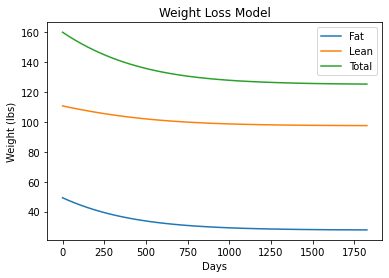

In [204]:
# Define time domain
t = np.linspace(0, 5*365)

# Define initial conditions
y0 = np.array([F0,L0])

# Solve the system with the new PAL and EI
PAL = 1.5
EI = 2025
sol = solve_ivp(weight_odesystem, (0,5*365), y0, t_eval=t, args=(PAL, EI))

# Plot the system
plt.plot(t, sol.y[0] * 2.204, label='Fat')
plt.plot(t, sol.y[1] * 2.204, label='Lean')
plt.plot(t, (sol.y[0]+sol.y[1]) * 2.204, label='Total')
plt.xlabel('Days')
plt.ylabel('Weight (lbs)')
plt.title('Weight Loss Model')
plt.legend()
plt.show()

# Problem 7

Modify the preceding problem to handle a two stage weightloss intervention: Suppose for the first 16 weeks intake is reduced from 2143 to 1600 calories/day and physical activity is increased from little to no exercise (PAL=1.4) to an hour of exercise 5 days per week (PAL=1.7). The following 16 weeks intake is increased from 1600 to 2025 calories/day, and exercise is limited to only 2-3 days per week (PAL=1.5).

You will need to recompute F0, and L0 at the end of the first 16 weeks, but K will stay the same. Find and graph the solution curve over the 32 week period.

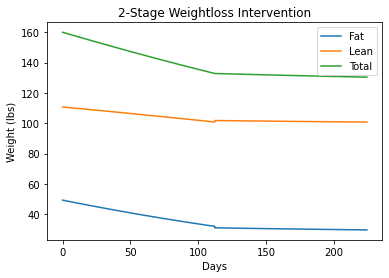

In [205]:
# Variables to use in solve_ivp
lbs = 160
age = 38
height_ft = 5 + (8/12)
sex = 'female'
F0 = fat_mass((1/2.204) * lbs, 38, 0.305 * height_ft, sex)
L0 = (lbs * (1/2.204)) - F0

# Define K with the initial PAL and EI
PAL = 1.4
EI = 2143
K = ((1/PAL) - beta_at)*EI - (gamma_f*F0) - (gamma_l*L0)

# Define 1st time domain
t = np.linspace(0, 7*16) # 16 weeks

# Define initial conditions
y0 = np.array([F0,L0])

# Solve the system with the new PAL and EI
PAL = 1.7
EI = 1600
sol1 = solve_ivp(weight_odesystem, (0,7*16), y0, t_eval=t, args=(PAL, EI))

# Recompute F0 and L0
lbs = (sol1.y[0][-1] + sol1.y[1][-1]) * 2.204
F0 = fat_mass((1/2.204) * lbs, 38, 0.305 * height_ft, sex)
L0 = (lbs * (1/2.204)) - F0

# Define new time domain
t2 = np.linspace (7*16, 7*32) # 16 weeks to 32 weeks

# Define initial conditions
y0 = np.array([F0,L0])

# Solve the system with new PAL and EI
PAL = 1.5
EI = 2025
sol2 = solve_ivp(weight_odesystem, (7*16, 7*32), y0, t_eval=t2, args=(PAL, EI))

# Plot the 2 models together
time = np.append(t, t2)
fat = 2.204 * np.append(sol1.y[0], sol2.y[0])
lean = 2.204 * np.append(sol1.y[1], sol2.y[1])
total = fat + lean
plt.plot(time, fat, label='Fat')
plt.plot(time, lean, label='Lean')
plt.plot(time, total, label='Total')
plt.xlabel('Days')
plt.ylabel('Weight (lbs)')
plt.legend()
plt.title('2-Stage Weightloss Intervention')
plt.show()

